In [15]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

In [16]:
def concat_ones(data):
    
    size = len(data)
    new_data = np.concatenate((data, np.ones((size, 1))), axis=1)
    
    return new_data

def prepare_data():
    
    uv = concat_ones(np.load("15_uv.npy"))
    xyz = concat_ones(np.load("15_xyz.npy") * 7)
    img = plt.imread("stereo2012a.jpg")
    origin_and_vanishing_pts = np.load("Vanishing XYZ.npy")

    return uv, xyz, img, origin_and_vanishing_pts

def projection_mse(actual, projected):    
    return np.mean((projected - actual)**2)

In [17]:
# Import all inputs
uv, xyz, img, origin_and_vanishing_pts = prepare_data()

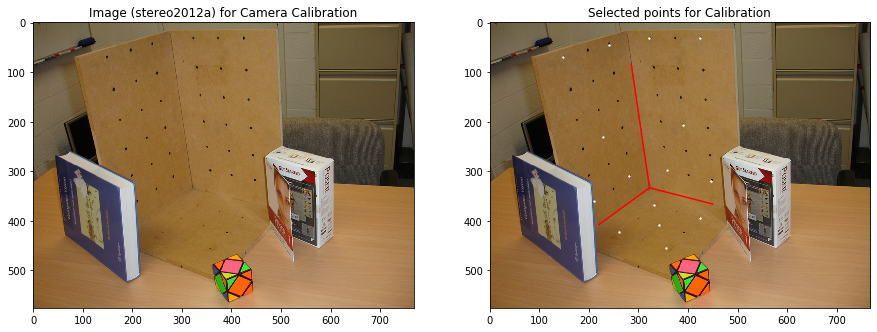

In [18]:
# Show images
fig, ax = plt.subplots(1, 2, figsize=(15,7))

# Show original stereo image
ax[0].imshow(img)
ax[0].set_title("Image (stereo2012a) for Camera Calibration")

# Show selected points on input image
ax[1].imshow(img)
ax[1].scatter(uv[:,0], uv[:,1], s=2, c='w')
ax[1].set_title("Selected points for Calibration")

# Visualize lines from the origin to the vanishing points in the X, Y and Z direction
color = 'red' # Line color
ax[1].plot(origin_and_vanishing_pts[:2,0], origin_and_vanishing_pts[:2,1], c=color)
ax[1].plot(origin_and_vanishing_pts[1:3,0], origin_and_vanishing_pts[1:3,1], c=color)
ax[1].plot(origin_and_vanishing_pts[[1,3],0], origin_and_vanishing_pts[[1,3],1], c=color)

plt.show()

In [19]:
equations = []
b = []
for i, ele in enumerate(xyz):
   
    u = uv[i, 0]
    v = uv[i, 1]
    eq1 = np.concatenate((ele, [0,0,0,0], -ele*u))[:-1]
    eq2 = np.concatenate(([0,0,0,0], ele, -ele*v))[:-1]

    equations.append(eq1)
    equations.append(eq2)

    b.append(u)
    b.append(v)


A, b = np.array(equations), np.array(b)

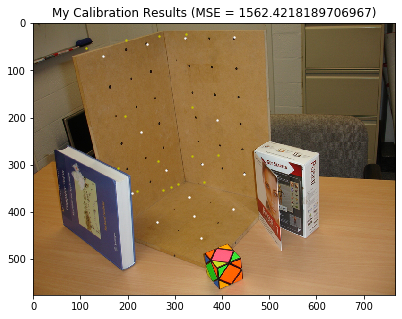

In [20]:
C = np.linalg.lstsq(A, b, rcond=None)[0]
C = np.concatenate((C, [1]))
C = C.reshape((3,4))

preds = []
for ele in xyz:
    preds.append((C @ ele))
preds = np.array(preds)   

# Show image
plt.figure(figsize=(10,5))
plt.imshow(img)
plt.scatter(uv[:,0], uv[:,1], s=2, c='w')
plt.scatter(preds[:,0], preds[:,1], s=2, c='y')
plt.title("My Calibration Results (MSE = {})".format(projection_mse(uv, preds)))
plt.show()

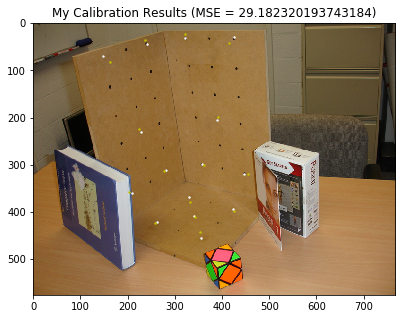

In [21]:
# Calculate MSE using predictions from Linear Regression
from sklearn.linear_model import LinearRegression
img = plt.imread("stereo2012a.jpg")

model = LinearRegression()
model.fit(xyz, uv)

preds = model.predict(xyz)

# Show image
plt.figure(figsize=(10,5))
plt.imshow(img)
plt.scatter(uv[:,0], uv[:,1], s=2, c='w')
plt.scatter(preds[:,0], preds[:,1], s=2, c='y')
plt.title("My Calibration Results (MSE = {})".format(projection_mse(uv, preds)))
plt.show()